# Part 1: Some helpful data processing information

In [49]:
# Importing data analysis and machine learning libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

# Importing data visualization libraries for plotting
import math
import matplotlib.image as image
from matplotlib import artist
import matplotlib.patches as mpatches
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from matplotlib.patches import Arc
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Franklin Gothic Medium', 'Franklin Gothic Book']

In [50]:
# Importing necessary data set. Required features for this clustering:
# pass start and end locations, success/failure, length, start distance
# from opposition goal, end distance from opposition goal
df = pd.read_csv(r'C:\Users\aaron\Documents\Faiv2021.csv')
pn = 'Romain Faivre'

df

,Unnamed: 0,playerName,etypename,x,y,endX,endY,outcomeKey,passlen,sdist,edist,isProg
0,12,Romain Faivre,Pass,72.280,7.072,66.144,9.928,1,6.768104,41.608600,44.861319,False
1,55,Romain Faivre,Pass,74.568,3.604,64.896,6.596,1,10.124211,42.310276,47.750414,False
2,68,Romain Faivre,Pass,92.352,8.296,99.112,33.388,0,25.986652,28.220055,4.926164,True
3,94,Romain Faivre,Pass,61.880,7.752,70.096,21.080,1,15.656891,49.629144,36.282332,True
4,197,Romain Faivre,Pass,77.064,2.924,80.080,7.208,1,5.239171,41.125003,35.916259,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,58369,Romain Faivre,Pass,54.808,21.080,47.840,31.484,1,12.521831,50.860390,56.216331,False
1466,58390,Romain Faivre,Pass,77.584,9.928,85.592,16.388,1,10.288813,35.738862,25.476205,True
1467,58431,Romain Faivre,Pass,59.072,42.840,46.800,51.272,1,14.889614,45.789418,59.750832,False
1468,58445,Romain Faivre,Pass,62.712,43.112,69.992,46.716,1,8.123252,42.281527,36.307585,False


In [51]:
# Calculates the Euclidean distance between the start point of the pass and
# the opposition goal
df['sdist'] =(((34-df['y'])**2+(104-df['x'])**2)**(1/2))

# Calculates the Euclidean distance between the end point of the pass and
# the opposition goal
df['edist'] = (((34-df['endY'])**2+(104-df['endX'])**2)**(1/2))

# Calculates whether or not a pass is progressive based on distance from
# goal at the start and end, and then filters for only progressive passes
df['isProg'] = ((df['sdist']-df['edist'])/df['sdist'] >= 0.25)
df = df[df['isProg'] == True]

# Filtering out corner kicks from the dataset. This might not be the best
# method but it has produced the best results of all methods I have tried
df = df[(df['x'] <= 103) | (df['y'] <= 67)]
df = df[(df['x'] <= 103) | (df['y'] >= 1)]
df

,Unnamed: 0,playerName,etypename,x,y,endX,endY,outcomeKey,passlen,sdist,edist,isProg
2,68,Romain Faivre,Pass,92.352,8.296,99.112,33.388,0,25.986652,28.220055,4.926164,True
3,94,Romain Faivre,Pass,61.880,7.752,70.096,21.080,1,15.656891,49.629144,36.282332,True
5,230,Romain Faivre,Pass,74.152,15.844,91.520,16.592,1,17.384100,34.936277,21.419357,True
16,740,Romain Faivre,Pass,69.888,22.304,96.928,34.068,0,29.488189,36.061405,7.072327,True
21,821,Romain Faivre,Pass,95.576,22.916,99.528,34.680,1,12.410077,13.921883,4.523404,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1428,57434,Romain Faivre,Pass,74.152,8.296,88.712,29.648,0,25.843790,39.390338,15.895372,True
1433,57626,Romain Faivre,Pass,87.568,1.904,101.192,32.096,0,33.123560,36.057785,3.392651,True
1441,57887,Romain Faivre,Pass,89.960,62.764,98.176,41.208,0,23.068676,32.007644,9.266835,True
1447,58029,Romain Faivre,Pass,100.464,16.728,101.192,31.144,0,14.434370,17.630238,4.005197,True


In [52]:
# Elbow Method: determining how many clusters to use in the final plots
K = range(1,20)
wss= []
for k in K:
    array = np.array(df[['x', 'y', 'endX', 'endY', 'passlen']])
    kmeans = KMeans(n_clusters = k, random_state = 100)
    kmeans.fit(array)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
    
mycenters = pd.DataFrame({'Clusters':K, 'WSS':wss})
mycenters

,Clusters,WSS
0,1,266671.912580
1,2,176359.862684
2,3,123757.332705
3,4,103935.360796
4,5,88380.342843
5,6,76842.859822
6,7,69967.709181
7,8,64334.296356
8,9,60815.202433
9,10,57136.885985


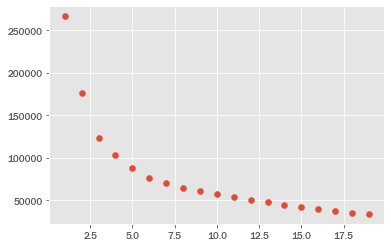

In [53]:
# Reading the results of the Elbow Method: imagine the shape created
# by this scatter plot as one of an arm. The part best-resembling an elbow
# is considered the "ideal" amount of clusters to use
plt.scatter(x=mycenters['Clusters'], y=mycenters['WSS'])

In [72]:
# Clustering the passes. Note that n_clusters = the result from the scatter
# plot above and is inputted manually
array = np.array(df[['x', 'y', 'endX', 'endY', 'passlen']])
kmeans = KMeans(n_clusters = 10, random_state = 100)
kmeans.fit(array)
df['cluster'] = kmeans.predict(array)

# Creates list to index most frequent clusters
art = df.cluster.value_counts().index.tolist()[0:3]

# Part 2: Pitch Plotting

Note that in this case, the pitch plotting is done using "How to Draw a Football Pitch" by Peter McKeever at this link: http://petermckeever.com/2020/10/how-to-draw-a-football-pitch/

An easier way to draw a football pitch is using the mplsoccer library, but I chose to do it this way because I stitch three images together here, and I had better results with these pitches. The stitching involves saving the outputs of three different clusters in a folder, and then importing and stitching them together

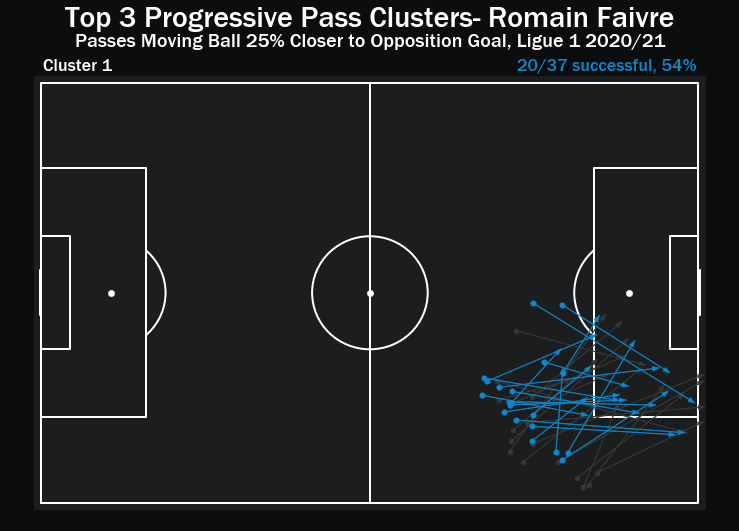

In [75]:
# Fonts for design purposes
sfont = {'fontname':'Franklin Gothic Book'}
bfont = {'fontname':'Franklin Gothic Medium'}

# Filtering for most frequent cluster
df2 = df[df['cluster'] == art[0]]

# Code from "How to Draw a Football Pitch" by Peter McKeever
fig, ax = plt.subplots(figsize=(13,8.5))
fig.patch.set_facecolor('#0b0d0f')
ax.set_facecolor('#1b1d1e')

ly1 = [0,0,68,68,0]
lx1 = [0,104,104,0,0]
plt.plot(lx1,ly1,color="white",zorder=5, linewidth=2)
    
ly2 = [13.84,13.84,54.16,54.16] 
lx2 = [104,87.5,87.5,104]
plt.plot(lx2,ly2,color="white",zorder=5, linewidth=2)

ly3 = [13.84,13.84,54.16,54.16] 
lx3 = [0,16.5,16.5,0]
plt.plot(lx3,ly3,color="white",zorder=5, linewidth=2)  

ly4 = [30.34,30.34,37.66,37.66]
lx4 = [104,104.2,104.2,104]
plt.plot(lx4,ly4,color="white",zorder=5, linewidth=2)

ly5 = [30.34,30.34,37.66,37.66]
lx5 = [0,-0.2,-0.2,0]
plt.plot(lx5,ly5,color="white",zorder=5, linewidth=2)

ly6 = [24.84,24.84,43.16,43.16]
lx6 = [104,99.5,99.5,104]
plt.plot(lx6,ly6,color="white",zorder=5, linewidth=2)

ly7 = [24.84,24.84,43.16,43.16]
lx7 = [0,4.5,4.5,0]
plt.plot(lx7,ly7,color="white",zorder=5, linewidth=2)

circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=2,color="white", fill=False, zorder=1,alpha=1)
circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=2,color="white", fill=False, zorder=1,alpha=1)
circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=2,color="white", fill=False, zorder=2,alpha=1)

circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=2,color="white", fill=False, zorder=1,alpha=1)
circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=2,color="white", fill=False, zorder=1,alpha=1)
circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=2,color="white", fill=False, zorder=2,alpha=1)

rec1 = plt.Rectangle((87.5,20), 16,30,ls='-',color="#1b1d1e", zorder=1,alpha=1, linewidth=2)
rec2 = plt.Rectangle((0, 20), 16.5,30,ls='-',color="#1b1d1e", zorder=1,alpha=1, linewidth=2)
rec3 = plt.Rectangle((-1,-1), 106,70,color='#1b1d1e',zorder=1,alpha=1, linewidth=2)

vcy5 = [0,68] 
vcx5 = [52,52]
plt.plot(vcx5,vcy5,color="white",zorder=5, linewidth=2)

plt.scatter(93,34,color="white",zorder=5, s=40)
plt.scatter(11,34,color="white",zorder=5, s=40)
plt.scatter(52,34,color="white",zorder=5, s=40)

ax.add_artist(rec3)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(rec1)
ax.add_artist(rec2)
ax.add_artist(circle3)

# Setting title of the plot
plt.title('Top 3 Progressive Pass Clusters- ' + pn + '\n', color='white', size=30, **bfont, horizontalalignment='center')

# Adding counters of successes and total passes
succ = 0
total = 0

# This loops through and plots one-by-one. For larger pass maps, consider
# a more efficient method of plotting arrows
for i in range(len(df2)):
    if list(df2['outcomeKey'])[i] == 0:
        plt.scatter(list(df2["x"])[i],list(df2["y"])[i],s=25, color="xkcd:dark grey", zorder=90)
        plt.arrow(list(df2['x'])[i], list(df2['y'])[i], \
                  list(df2['endX'])[i]-list(df2['x'])[i], \
                list(df2['endY'])[i]-list(df2['y'])[i], \
                  color='xkcd:dark grey', width=0.1, head_width=0.75, zorder=90)
        total +=1
    else:
        plt.scatter(list(df2["x"])[i],list(df2["y"])[i],s=30, color="xkcd:water blue", zorder=100)  
        plt.arrow(list(df2['x'])[i], list(df2['y'])[i],\
                  list(df2['endX'])[i]-list(df2['x'])[i], \
                  list(df2['endY'])[i]-list(df2['y'])[i], \
                 color='xkcd:water blue', width=0.1, head_width=0.75, zorder=100)
        succ +=1
        total += 1

# Text captions for the plot:
plt.text(0.5, 1.06, "Passes Moving Ball 25% Closer to Opposition Goal, Ligue 1 2020/21", \
         horizontalalignment='center', verticalalignment='top', color='white', size='20', \
             transform=ax.transAxes)
plt.text(0.95, 0.99, str(succ)+'/'+str(total)+' successful, ' + str(round(succ/total*100)) + '%', \
         horizontalalignment='right', verticalalignment='center', color='xkcd:water blue', size='18', \
             transform=ax.transAxes, zorder=100)
plt.text(0.05, 0.99, 'Cluster 1', \
         horizontalalignment='left', verticalalignment='center', color='white', size='18', \
             transform=ax.transAxes, zorder=100)

# Disabling axes
plt.axis('Off')

# Saving photo locally
f1 = r'C:\Users\aaron\Pictures\mplgen\001.png'
plt.savefig(f1, transparent=False,\
           dpi=500, bbox_inches = 'tight', facecolor=fig.get_facecolor())

# Displaying output that was saved
plt.show()

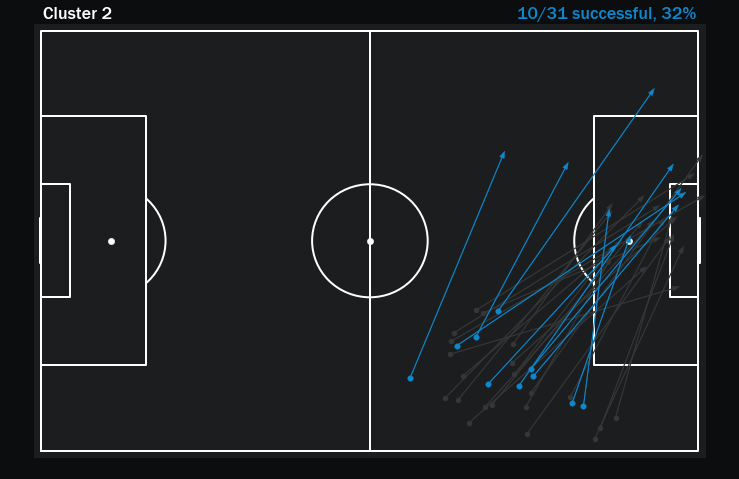

In [74]:
# Filtering for second-most frequent cluster
df3 = df[df['cluster'] == art[1]]

# Code from "How to Draw a Football Pitch" by Peter McKeever
fig, ax = plt.subplots(figsize=(13,8.5))
fig.patch.set_facecolor('#0b0d0f')
ax.set_facecolor('#1b1d1e')

ly1 = [0,0,68,68,0]
lx1 = [0,104,104,0,0]
plt.plot(lx1,ly1,color="white",zorder=5, linewidth=2)
    
ly2 = [13.84,13.84,54.16,54.16] 
lx2 = [104,87.5,87.5,104]
plt.plot(lx2,ly2,color="white",zorder=5, linewidth=2)

ly3 = [13.84,13.84,54.16,54.16] 
lx3 = [0,16.5,16.5,0]
plt.plot(lx3,ly3,color="white",zorder=5, linewidth=2)  

ly4 = [30.34,30.34,37.66,37.66]
lx4 = [104,104.2,104.2,104]
plt.plot(lx4,ly4,color="white",zorder=5, linewidth=2)

ly5 = [30.34,30.34,37.66,37.66]
lx5 = [0,-0.2,-0.2,0]
plt.plot(lx5,ly5,color="white",zorder=5, linewidth=2)

ly6 = [24.84,24.84,43.16,43.16]
lx6 = [104,99.5,99.5,104]
plt.plot(lx6,ly6,color="white",zorder=5, linewidth=2)

ly7 = [24.84,24.84,43.16,43.16]
lx7 = [0,4.5,4.5,0]
plt.plot(lx7,ly7,color="white",zorder=5, linewidth=2)

circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=2,color="white", fill=False, zorder=1,alpha=1)
circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=2,color="white", fill=False, zorder=1,alpha=1)
circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=2,color="white", fill=False, zorder=2,alpha=1)

circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=2,color="white", fill=False, zorder=1,alpha=1)
circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=2,color="white", fill=False, zorder=1,alpha=1)
circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=2,color="white", fill=False, zorder=2,alpha=1)

## Rectangles in boxes
rec1 = plt.Rectangle((87.5,20), 16,30,ls='-',color="#1b1d1e", zorder=1,alpha=1, linewidth=2)
rec2 = plt.Rectangle((0, 20), 16.5,30,ls='-',color="#1b1d1e", zorder=1,alpha=1, linewidth=2)
rec3 = plt.Rectangle((-1,-1), 106,70,color='#1b1d1e',zorder=1,alpha=1, linewidth=2)

vcy5 = [0,68] 
vcx5 = [52,52]
plt.plot(vcx5,vcy5,color="white",zorder=5, linewidth=2)

plt.scatter(93,34,color="white",zorder=5, s=40)
plt.scatter(11,34,color="white",zorder=5, s=40)
plt.scatter(52,34,color="white",zorder=5, s=40)

ax.add_artist(rec3)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(rec1)
ax.add_artist(rec2)
ax.add_artist(circle3)

# Adding counters of successes and total passes
succ = 0
total = 0

# This loops through and plots one-by-one. For larger pass maps, consider
# a more efficient method of plotting arrows
for i in range(len(df3)):
    if list(df3['outcomeKey'])[i] == 0:
        plt.scatter(list(df3["x"])[i],list(df3["y"])[i],s=25, color="xkcd:dark grey", zorder=90)
        plt.arrow(list(df3['x'])[i], list(df3['y'])[i], \
                  list(df3['endX'])[i]-list(df3['x'])[i], \
                list(df3['endY'])[i]-list(df3['y'])[i], \
                  color='xkcd:dark grey', width=0.1, head_width=0.75, zorder=90)
        total +=1
    else:
        plt.scatter(list(df3["x"])[i],list(df3["y"])[i],s=30, color="xkcd:water blue", zorder=100)  
        plt.arrow(list(df3['x'])[i], list(df3['y'])[i],\
                  list(df3['endX'])[i]-list(df3['x'])[i], \
                  list(df3['endY'])[i]-list(df3['y'])[i], \
                 color='xkcd:water blue', width=0.1, head_width=0.75, zorder=100)
        succ +=1
        total += 1

# Text captions for the plot 
plt.text(0.95, 0.99, str(succ)+'/'+str(total)+' successful, ' + str(round(succ/total*100)) + '%', \
         horizontalalignment='right', verticalalignment='center', color='xkcd:water blue', size='18', \
             transform=ax.transAxes, zorder=100)
plt.text(0.05, 0.99, 'Cluster 2', \
         horizontalalignment='left', verticalalignment='center', color='white', size='18', \
             transform=ax.transAxes, zorder=100)

# Disabling axes
plt.axis('Off')

# Saving photo locally
f2 = r'C:\Users\aaron\Pictures\mplgen\002.png'
plt.savefig(f2, transparent=False,\
           dpi=500, bbox_inches = 'tight', facecolor=fig.get_facecolor())

# Displaying output that was saved
plt.show()

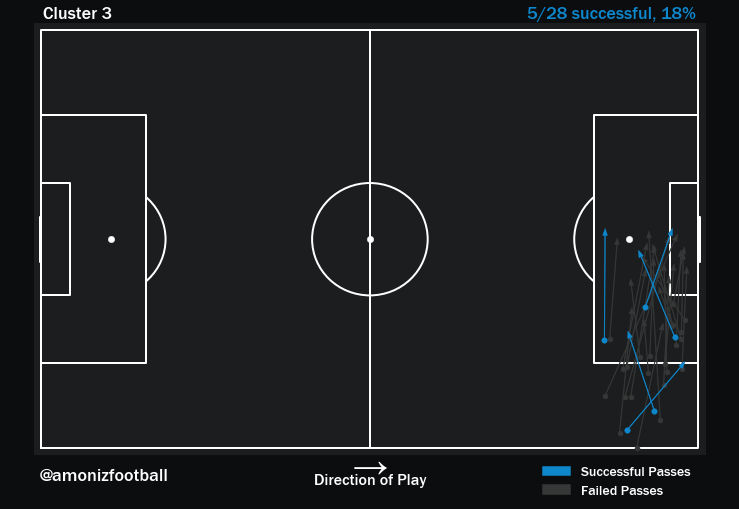

In [76]:
# Filtering for third-most frequent cluster
df4 = df[df['cluster'] == art[2]]

# Code from "How to Draw a Football Pitch" by Peter McKeever
fig, ax = plt.subplots(figsize=(13,8.5))
fig.patch.set_facecolor('#0b0d0f')
ax.set_facecolor('#1b1d1e')

ly1 = [0,0,68,68,0]
lx1 = [0,104,104,0,0]
plt.plot(lx1,ly1,color="white",zorder=5, linewidth=2)
    
ly2 = [13.84,13.84,54.16,54.16] 
lx2 = [104,87.5,87.5,104]
plt.plot(lx2,ly2,color="white",zorder=5, linewidth=2)

ly3 = [13.84,13.84,54.16,54.16] 
lx3 = [0,16.5,16.5,0]
plt.plot(lx3,ly3,color="white",zorder=5, linewidth=2)  

ly4 = [30.34,30.34,37.66,37.66]
lx4 = [104,104.2,104.2,104]
plt.plot(lx4,ly4,color="white",zorder=5, linewidth=2)

ly5 = [30.34,30.34,37.66,37.66]
lx5 = [0,-0.2,-0.2,0]
plt.plot(lx5,ly5,color="white",zorder=5, linewidth=2)

ly6 = [24.84,24.84,43.16,43.16]
lx6 = [104,99.5,99.5,104]
plt.plot(lx6,ly6,color="white",zorder=5, linewidth=2)

ly7 = [24.84,24.84,43.16,43.16]
lx7 = [0,4.5,4.5,0]
plt.plot(lx7,ly7,color="white",zorder=5, linewidth=2)

circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=2,color="white", fill=False, zorder=1,alpha=1)
circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=2,color="white", fill=False, zorder=1,alpha=1)
circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=2,color="white", fill=False, zorder=2,alpha=1)

circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=2,color="white", fill=False, zorder=1,alpha=1)
circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=2,color="white", fill=False, zorder=1,alpha=1)
circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=2,color="white", fill=False, zorder=2,alpha=1)

## Rectangles in boxes
rec1 = plt.Rectangle((87.5,20), 16,30,ls='-',color="#1b1d1e", zorder=1,alpha=1, linewidth=2)
rec2 = plt.Rectangle((0, 20), 16.5,30,ls='-',color="#1b1d1e", zorder=1,alpha=1, linewidth=2)
rec3 = plt.Rectangle((-1,-1), 106,70,color='#1b1d1e',zorder=1,alpha=1, linewidth=2)
vcy5 = [0,68] 
vcx5 = [52,52]
plt.plot(vcx5,vcy5,color="white",zorder=5, linewidth=2)

plt.scatter(93,34,color="white",zorder=5, s=40)
plt.scatter(11,34,color="white",zorder=5, s=40)
plt.scatter(52,34,color="white",zorder=5, s=40)

ax.add_artist(rec3)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(rec1)
ax.add_artist(rec2)
ax.add_artist(circle3)

# Adding counters of successes and total passes
succ = 0
total = 0

# This loops through and plots one-by-one. For larger pass maps, consider
# a more efficient method of plotting arrows
for i in range(len(df4)):
    if list(df4['outcomeKey'])[i] == 0:
        plt.scatter(list(df4["x"])[i],list(df4["y"])[i],s=25, color="xkcd:dark grey", zorder=90)
        plt.arrow(list(df4['x'])[i], list(df4['y'])[i], \
                  list(df4['endX'])[i]-list(df4['x'])[i], \
                list(df4['endY'])[i]-list(df4['y'])[i], \
                  color='xkcd:dark grey', width=0.1, head_width=0.75, zorder=90)
        total +=1
    else:
        plt.scatter(list(df4["x"])[i],list(df4["y"])[i],s=30, color="xkcd:water blue", zorder=100)  
        plt.arrow(list(df4['x'])[i], list(df4['y'])[i],\
                  list(df4['endX'])[i]-list(df4['x'])[i], \
                  list(df4['endY'])[i]-list(df4['y'])[i], \
                 color='xkcd:water blue', width=0.1, head_width=0.75, zorder=100)
        succ +=1
        total += 1

# Text captions for the plot         
plt.text(0.045, -0.01, '@amonizfootball', \
         horizontalalignment='left', verticalalignment='center', color='white', \
             transform=ax.transAxes, size='18')
plt.text(0.5, -0.02, "Direction of Play", \
         horizontalalignment='center', verticalalignment='center', color='white', size='16', \
             transform=ax.transAxes)
plt.text(0.5, 0.01, "→", \
         horizontalalignment='center', verticalalignment='center', color='white', size='35', \
             transform=ax.transAxes)
plt.text(0.95, 0.99, str(succ)+'/'+str(total)+' successful, ' + str(round(succ/total*100)) + '%', \
         horizontalalignment='right', verticalalignment='center', color='xkcd:water blue', size='18', \
             transform=ax.transAxes, zorder=100)
plt.text(0.05, 0.99, 'Cluster 3', \
         horizontalalignment='left', verticalalignment='center', color='white', size='18', \
             transform=ax.transAxes, zorder=100)

green_patch = mpatches.Patch(color='xkcd:water blue', label='Successful Passes')
red_patch = mpatches.Patch(color='xkcd:dark grey', label='Failed Passes')
leg = plt.legend(handles=[green_patch, red_patch], bbox_to_anchor=(0.96,0.04), prop={'size':14}) 
for text in leg.get_texts():
    plt.setp(text, color = 'white')
frame = leg.get_frame()
frame.set_color('#0b0d0f')

# Disabling axes
plt.axis('Off')

# Saving photo locally
f3 = r'C:\Users\aaron\Pictures\mplgen\003.png'
plt.savefig(f3, transparent=False,\
           dpi=500, bbox_inches = 'tight', facecolor=fig.get_facecolor())

# Displaying output that was saved
plt.show()

In [78]:
# Imports three previously saved images, stitches them together
# and saves output as png file
from PIL import Image

def merge_images(file1, file2, file3):
    """Merge two images into one, displayed side by side
    :param file1: path to first image file
    :param file2: path to second image file
    :return: the merged Image object
    """
    image1 = Image.open(file1)
    image2 = Image.open(file2)
    image3 = Image.open(file3)

    (width1, height1) = image1.size
    (width2, height2) = image2.size
    (width3, height3) = image3.size

    result_width = width1
    result_height = height1+height2+height3

    result = Image.new('RGB', (result_width, result_height))
    result.paste(im=image1, box=(0, 0))
    result.paste(im=image2, box=(0, height1))
    result.paste(im=image3, box=(0, height1+height2))
    return result

merged = merge_images(f1,f2,f3)
merged.save(r'C:\Users\aaron\Pictures\Prog Clusters ' + pn + '.png')